In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
 #re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\train"
valid_path = r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\val"

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob(train_path + '/*')
# Count the number of folders, which equals the number of output classes
num_classes = len(folders)

# Print the number of output classes
print("Number of output classes:", num_classes)

Number of output classes: 10


In [8]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)



In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\val",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1001 images belonging to 10 classes.


In [16]:
# fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - accuracy: 0.7143 - loss: 2.2595 - val_accuracy: 0.6873 - val_loss: 2.9773
Epoch 2/10


C:\Users\aman\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 485s 2s/step - accuracy: 0.7896 - loss: 1.8868 - val_accuracy: 0.7512 - val_loss: 2.9608
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.8130 - loss: 1.7587 - val_accuracy: 0.7682 - val_loss: 2.7407
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.8350 - loss: 1.5568 - val_accuracy: 0.7433 - val_loss: 3.7346
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 473s 1

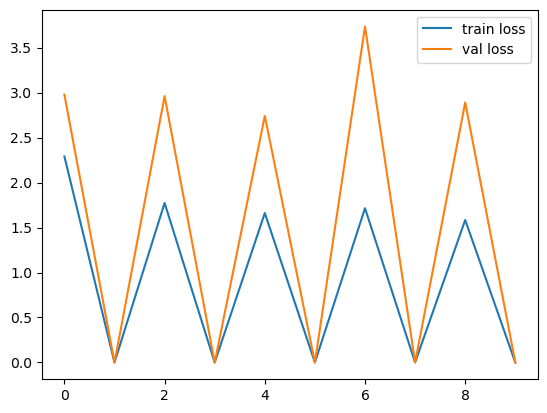

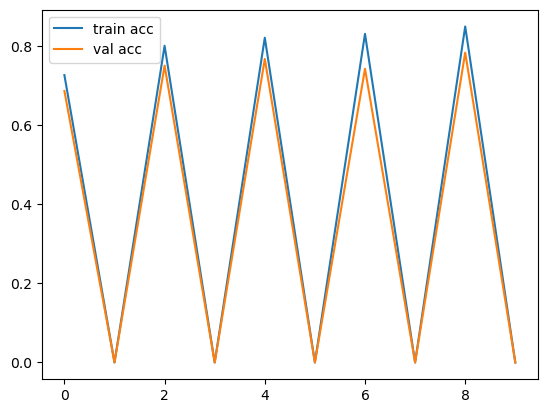

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model_inception.keras')

In [19]:
y_pred = model.predict(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step 


In [20]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.9772327e-30, 1.8488723e-28, ..., 1.8614706e-34,
        0.0000000e+00, 3.9738722e-02],
       [1.8508791e-22, 5.4559708e-09, 4.2034239e-02, ..., 2.3982987e-28,
        3.4867073e-37, 1.7374393e-31],
       ...,
       [1.0249650e-30, 3.0816441e-27, 2.8841244e-19, ..., 4.7129528e-25,
        1.9847177e-18, 0.0000000e+00],
       [2.7500695e-05, 8.6912923e-02, 2.6631797e-18, ..., 4.2212725e-28,
        1.3158490e-31, 2.4578407e-24],
       [1.6796406e-26, 1.8058351e-14, 1.0000000e+00, ..., 4.4967515e-26,
        0.0000000e+00, 1.3735243e-36]], dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([7, 5, 4, ..., 3, 4, 2], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
img=image.load_img(r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\val\Tomato___healthy\00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG",target_size=(224,224))
x=image.img_to_array(img)

In [30]:
x

array([[[[ 0.6313726 ,  0.5764706 ,  0.6392157 ],
         [ 0.33333337,  0.27843142,  0.3411765 ],
         [ 0.41960788,  0.36470592,  0.427451  ],
         ...,
         [ 0.10588241,  0.05882359,  0.1686275 ],
         [-0.06666666, -0.11372548, -0.00392157],
         [-0.12156862, -0.16862744, -0.05882353]],

        [[ 0.07450986,  0.0196079 ,  0.082353  ],
         [ 0.082353  ,  0.02745104,  0.09019613],
         [ 0.13725495,  0.082353  ,  0.14509809],
         ...,
         [ 0.3176471 ,  0.27058828,  0.3803922 ],
         [ 0.00392163, -0.04313725,  0.06666672],
         [-0.06666666, -0.11372548, -0.00392157]],

        [[ 0.48235297,  0.427451  ,  0.4901961 ],
         [-0.00392157, -0.05882353,  0.00392163],
         [ 0.4901961 ,  0.43529415,  0.49803925],
         ...,
         [ 0.26274514,  0.21568632,  0.32549024],
         [ 0.2941177 ,  0.24705887,  0.35686278],
         [ 0.00392163, -0.04313725,  0.06666672]],

        ...,

        [[ 0.05882359, -0.03529412,  0

In [27]:
x.shape

(224, 224, 3)

In [28]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([[2.48924612e-26, 9.58040158e-12, 3.71605297e-15, 2.43680562e-11,
        1.49784471e-24, 9.99673843e-01, 1.02795150e-09, 7.00560145e-16,
        1.44367485e-33, 3.26226786e-04]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [32]:
a==9

array([False])